# 0 preparation

In [ ]:
!pwd

/content


In [ ]:
!git clone https://github.com/zhuodi-cai/moondream.git

Cloning into 'moondream'...
remote: Enumerating objects: 101, done.
remote: Counting objects: 100% (42/42), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 101 (delta 33), reused 26 (delta 26), pack-reused 59
Receiving objects: 100% (101/101), 544.58 KiB | 2.34 MiB/s, done.
Resolving deltas: 100% (44/44), done.


In [ ]:
%cd /content/moondream/

/content/moondream


In [ ]:
!pwd

/content/moondream


In [ ]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 330.1/330.1 kB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 67.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 88.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 86.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 72.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 58.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 56.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━

# 1 run!


In [ ]:
from moondream import VisionEncoder, TextModel
from PIL import Image
from huggingface_hub import snapshot_download
import argparse
from threading import Thread
from transformers import TextIteratorStreamer
import re

model_path = snapshot_download("vikhyatk/moondream1")

vision_encoder = VisionEncoder(model_path)
text_model = TextModel(model_path)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Fetching 18 files:   0%|          | 0/18 [00:00<?, ?it/s]

assets/demo-1.jpg:   0%|          | 0.00/285k [00:00<?, ?B/s]

assets/demo-3.jpg:   0%|          | 0.00/70.8k [00:00<?, ?B/s]

assets/demo-5.jpg:   0%|          | 0.00/9.51k [00:00<?, ?B/s]

.gitattributes:   0%|          | 0.00/1.52k [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.87k [00:00<?, ?B/s]

assets/demo-2.jpg:   0%|          | 0.00/139k [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/7.56G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

text_model.pt:   0%|          | 0.00/2.84G [00:00<?, ?B/s]

text_model_cfg.json:   0%|          | 0.00/795 [00:00<?, ?B/s]

tokenizer/added_tokens.json:   0%|          | 0.00/1.08k [00:00<?, ?B/s]

assets/demo-4.jpg:   0%|          | 0.00/30.2k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/99.0 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/7.34k [00:00<?, ?B/s]

vision.pt:   0%|          | 0.00/1.89G [00:00<?, ?B/s]

tokenizer/tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

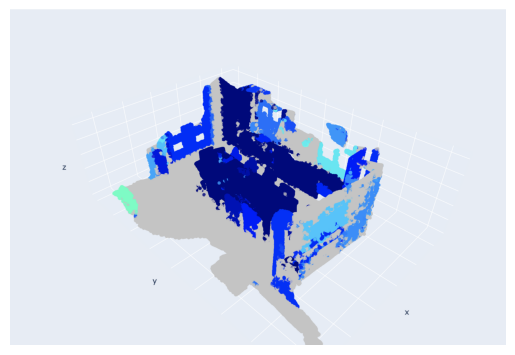

> Can you describe the scene in details?
The image features a 3D map of a city, with a blue color scheme dominating the scene. The city appears to be densely populated, as evidenced by the numerous buildings scattered across the map. The buildings are of various sizes and shapes, showcasing the city's architectural diversity.

In addition to the buildings, there are several cars visible on the map, indicating that the city is bustling with traffic. The cars are dispersed throughout the city, with some closer to the foreground and others further in the background. Overall, the scene captures the essence of a vibrant urban environment.


In [ ]:
import cv2
import numpy as np
from google.colab import files

# image_path = "/content/moondream/assets/demo-4.jpg"
image_path = "/watch_a_movie_seg.jpg"
image_prompt = "Can you describe the scene in details?"

## or you can upload an image file and type a prompt :)
# image_upload = files.upload()
# image_path = list(image_upload.keys())[0]
# image_prompt = input("Enter the prompt: ")

# read image and convert it to PIL format (different from the writing in the ".py" file)
image_np = cv2.imread(image_path)
image_pil = Image.fromarray(cv2.cvtColor(image_np, cv2.COLOR_BGR2RGB))



import matplotlib.pyplot as plt

plt.imshow(cv2.cvtColor(image_np, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()



image_embeds = vision_encoder(image_pil)

if image_prompt is None:
    while True:
        question = input("> ")

        streamer = TextIteratorStreamer(text_model.tokenizer, skip_special_tokens=True)
        generation_kwargs = dict(
            image_embeds=image_embeds, question=question, streamer=streamer
        )
        thread = Thread(target=text_model.answer_question, kwargs=generation_kwargs)
        thread.start()

        buffer = ""
        for new_text in streamer:
            buffer += new_text
            if not new_text.endswith("<") and not new_text.endswith("END"):
                print(buffer, end="", flush=True)
                buffer = ""
        print(re.sub("<$", "", re.sub("END$", "", buffer)))
else:
    question = image_prompt
    print(">", question)
    print(text_model.answer_question(image_embeds, question))

